## SVM-Tamil

In [2]:
pwd

'/dist_home/jairam/Notebooks-ASAI/comparison'

## RBF

Training data: (5947, 39), Test data: (1488, 39)
              precision    recall  f1-score   support

  Coimbatore       0.78      0.57      0.66       360
     Madurai       0.76      0.91      0.83       370
 Thoothukudi       0.89      0.73      0.80       390
     Chennai       0.67      0.85      0.75       368

    accuracy                           0.76      1488
   macro avg       0.78      0.76      0.76      1488
weighted avg       0.78      0.76      0.76      1488



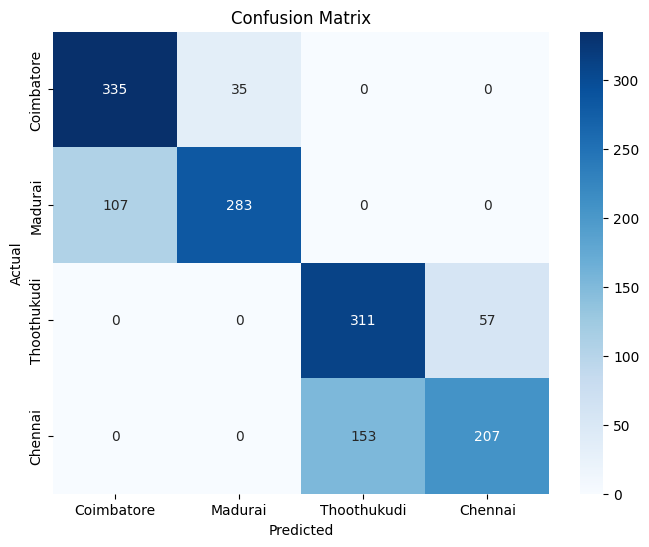

In [4]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Tamil'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for SVM
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Linear

Training data: (5947, 39), Test data: (1488, 39)
              precision    recall  f1-score   support

  Coimbatore       0.80      0.70      0.75       360
     Madurai       0.95      0.91      0.93       370
 Thoothukudi       0.92      0.95      0.93       390
     Chennai       0.74      0.83      0.78       368

    accuracy                           0.85      1488
   macro avg       0.85      0.85      0.85      1488
weighted avg       0.85      0.85      0.85      1488



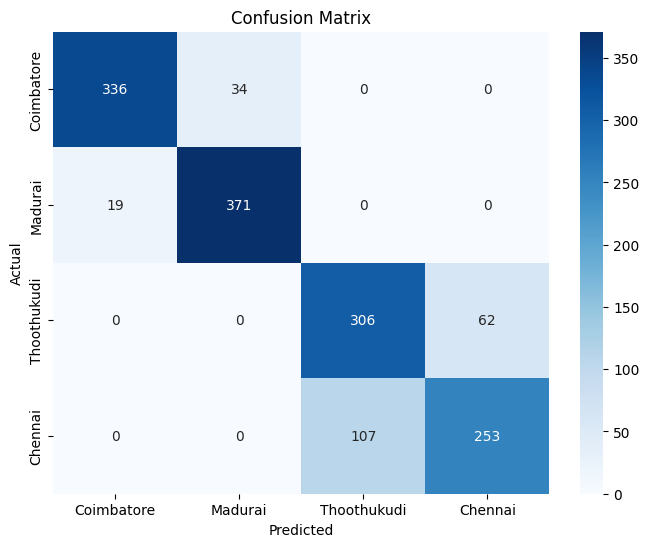

In [5]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Tamil'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for SVM
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### SVM-Malayalam

## RBF

Training data: (6455, 39), Test data: (1614, 39)
              precision    recall  f1-score   support

   Kozhikode       0.73      0.58      0.65       359
    Kottayam       0.72      1.00      0.84       498
  Trivandrum       0.58      0.86      0.70       426
    Thrissur       1.00      0.04      0.07       331

    accuracy                           0.67      1614
   macro avg       0.76      0.62      0.56      1614
weighted avg       0.74      0.67      0.60      1614



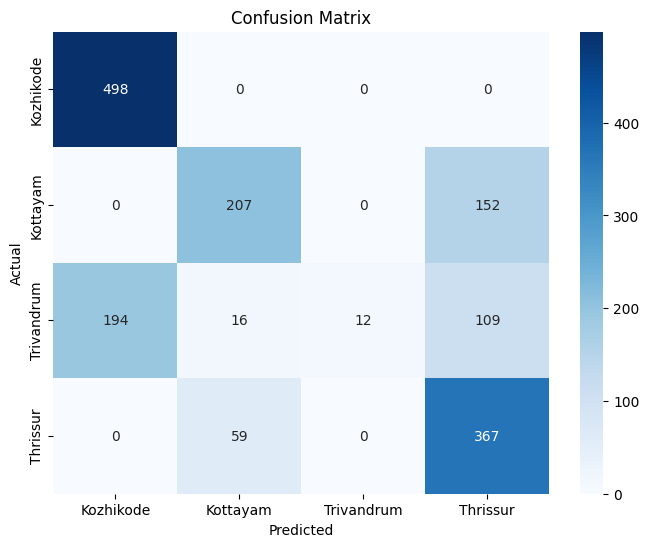

In [7]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Malayalam'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for SVM
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Linear

Training data: (6455, 39), Test data: (1614, 39)
              precision    recall  f1-score   support

   Kozhikode       0.81      0.79      0.80       359
    Kottayam       0.91      0.91      0.91       498
  Trivandrum       0.79      0.84      0.82       426
    Thrissur       0.78      0.73      0.75       331

    accuracy                           0.83      1614
   macro avg       0.82      0.82      0.82      1614
weighted avg       0.83      0.83      0.83      1614



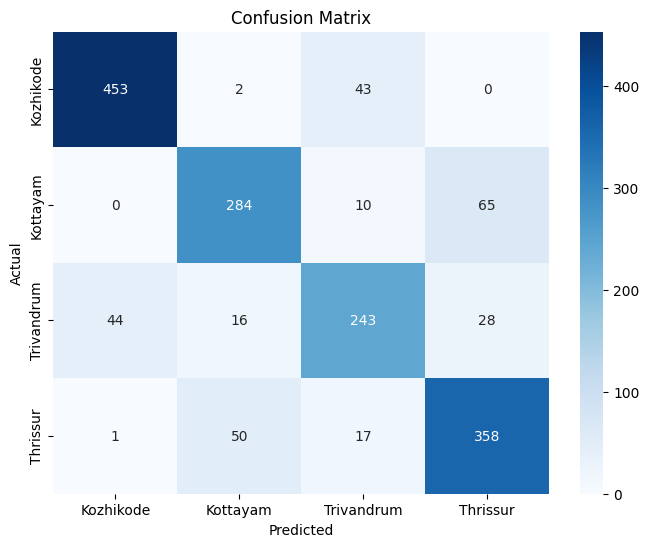

In [8]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Malayalam'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for SVM
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Kannada

## RBF

Training data: (6456, 39), Test data: (1615, 39)
              precision    recall  f1-score   support

   Kundapura       0.65      0.66      0.66       404
     Coastal       0.73      0.73      0.73       406
       North       0.61      0.54      0.57       403
     Mandhya       0.62      0.69      0.65       402

    accuracy                           0.65      1615
   macro avg       0.65      0.65      0.65      1615
weighted avg       0.65      0.65      0.65      1615



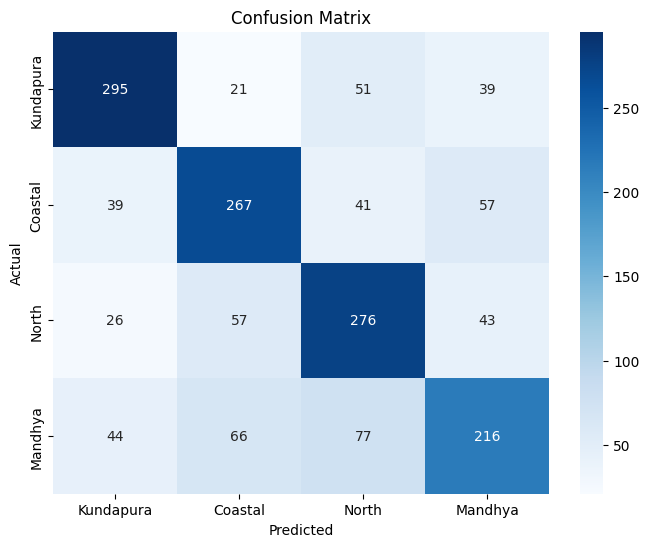

In [9]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Kannada'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for SVM
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Linear

Training data: (6456, 39), Test data: (1615, 39)
              precision    recall  f1-score   support

   Kundapura       0.80      0.77      0.79       404
     Coastal       0.77      0.83      0.80       406
       North       0.75      0.71      0.73       403
     Mandhya       0.77      0.78      0.78       402

    accuracy                           0.77      1615
   macro avg       0.77      0.77      0.77      1615
weighted avg       0.77      0.77      0.77      1615



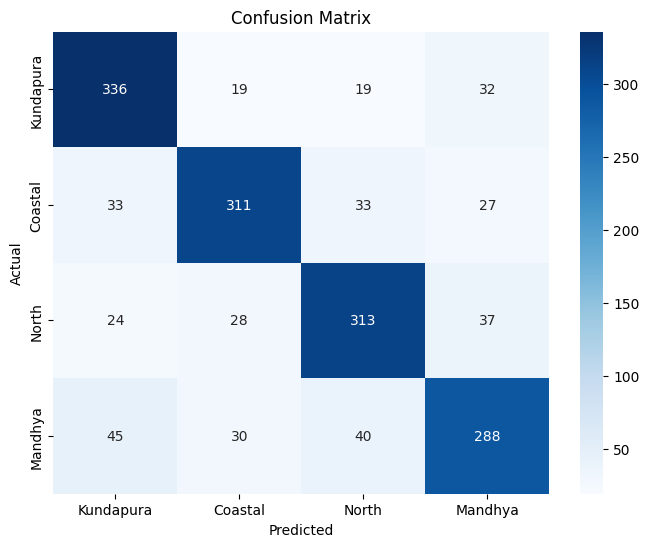

In [10]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def extract_mfcc(file_path, n_mfcc=39, n_fft=480, hop_length=512):
    """Extract MFCC features from an audio file."""
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean across time axis
    return mfcc

def load_data(data_dir):
    """Load data from a directory organized by subfolders (labels), excluding unwanted directories."""
    X, y = [], []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        # Skip unwanted directories like .ipynb_checkpoints
        if os.path.isdir(label_dir) and not label.startswith('.'):
            labels.append(label)
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                mfcc_features = extract_mfcc(file_path)
                X.append(mfcc_features)
                y.append(label)
    
    return np.array(X), np.array(y), labels

# Load the data
data_dir = '/dist_home/jairam/Kannada'
X, y, labels = load_data(data_dir)

# Split the data into train/test/validation or train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Check if validation data is needed for SVM
use_validation = False

if use_validation:
    print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")
else:
    # Merge validation into training data
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))
    print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
